--> Classify whether the flight will be delayed or not.

--> Performing regression to determine by how long it will be delayed.

--> Performing regression analysis based on the Flight Delay Time.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  mean_absolute_error, classification_report,  r2_score, mean_absolute_error, mean_squared_error


In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/random_forest_classifier.pkl','rb') as f:
  classifier = pickle.load(f)

Loading the saved RF classifier and Extra Trees regressor

In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/et_regressor.pkl','rb') as f:
  regressor = pickle.load(f)

In [ ]:
classifier

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
type(classifier)

sklearn.ensemble._forest.RandomForestClassifier

In [ ]:
regressor

ExtraTreesRegressor(n_jobs=-1)

In [ ]:
type(regressor)

sklearn.ensemble._forest.ExtraTreesRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = [0])
data.shape

(1840277, 33)

In [ ]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'New_time', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'humidity', 'date', 'time', 'airport_code'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['airport_code','FlightDate','OriginAirportID', 'DestAirportID', 'CRSArrTime', 'ArrTime', 'New_time','date'])


In [ ]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [ ]:
X = data.drop(columns = ['ArrDel15','ArrDelayMinutes'],axis = 1)
y = data['ArrDel15']

RANDOM FOREST CLASSIFIER

In [ ]:
y_pred_classifier= classifier.predict(X)
print(classification_report(y_pred_classifier, y))


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   1460791
         1.0       0.95      0.96      0.95    379486

    accuracy                           0.98   1840277
   macro avg       0.97      0.97      0.97   1840277
weighted avg       0.98      0.98      0.98   1840277



In [ ]:
y_pred_classifier

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
data['Predicted_ArrDel15'] = y_pred_classifier

In [ ]:
data[['ArrDel15','Predicted_ArrDel15']]

,ArrDel15,Predicted_ArrDel15
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1840272,0.0,0.0
1840273,0.0,0.0
1840274,0.0,0.0
1840275,0.0,0.0


In [ ]:
regression_data = data[data['Predicted_ArrDel15']==1]
#regression_data = regression_data.drop(columns = ['Predicted_ArrDel15','ArrDel15'])

In [ ]:
regression_data = regression_data[regression_data['ArrDelayMinutes']>15]

In [ ]:
regression_data

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,Predicted_ArrDel15
1,2016,1,1,1,13,14,724,759.0,35.0,1.0,...,10,1030,0,23,8,34,29,66,700,1.0
9,2016,1,1,1,13,7,705,745.0,40.0,1.0,...,10,1030,0,23,8,34,29,66,700,1.0
13,2016,1,1,2,13,8,655,720.0,25.0,1.0,...,10,1024,0,24,8,36,32,64,700,1.0
14,2016,1,1,2,13,8,730,730.0,0.0,0.0,...,10,1024,0,24,8,36,32,64,700,1.0
17,2016,1,1,2,13,0,745,745.0,0.0,0.0,...,10,1024,0,24,8,36,32,64,700,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840220,2017,4,12,3,5,3,2150,2220.0,30.0,1.0,...,9,1017,100,64,23,66,66,95,2200,1.0
1840230,2017,4,12,2,4,7,2015,2123.0,68.0,1.0,...,10,1024,77,35,7,43,43,73,2000,1.0
1840244,2017,4,12,18,4,8,1500,1705.0,125.0,1.0,...,10,1017,100,35,14,36,32,98,1500,1.0
1840264,2017,4,12,17,5,0,1959,709.0,670.0,1.0,...,10,1019,99,54,7,58,58,88,2000,1.0


In [ ]:
X = regression_data.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15'])

In [ ]:
y = regression_data['ArrDelayMinutes']

In [ ]:
X.columns


Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'Origin', 'Dest',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'humidity', 'time'],
      dtype='object')

Extra Trees Regressor


In [ ]:
y_pred_regressor = regressor.predict(X)

In [ ]:
def Metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = mse ** 0.5
    r2 = r2_score(ytest, ypred)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-Squared: ", r2)

In [ ]:
Metrics(y, y_pred_regressor)

MAE:  3.654379371518322
MSE:  90.01234395487519
RMSE:  9.487483541744629
R-Squared:  0.9834929275254956


In [ ]:
regression_data['Predicted_ArrDelayMinutes'] = y_pred_regressor

In [ ]:
regression_data[['ArrDel15','Predicted_ArrDelayMinutes','ArrDelayMinutes','Predicted_ArrDel15']]

,ArrDel15,Predicted_ArrDelayMinutes,ArrDelayMinutes,Predicted_ArrDel15
1,1.0,24.00,24.0,1.0
9,1.0,37.00,37.0,1.0
13,1.0,46.00,46.0,1.0
14,1.0,21.00,21.0,1.0
17,1.0,22.00,22.0,1.0
...,...,...,...,...
1840220,1.0,30.27,21.0,1.0
1840230,1.0,76.00,76.0,1.0
1840244,1.0,84.00,84.0,1.0
1840264,1.0,657.00,657.0,1.0


In [ ]:
min = regression_data['ArrDelayMinutes'].min()
min

16.0

In [ ]:
regression_data['Predicted_ArrDelayMinutes'].min()

16.0

In [ ]:
max = regression_data['ArrDelayMinutes'].max()
max

2142.0

In [ ]:
regression_data['Predicted_ArrDelayMinutes'].max()

2142.0

REGRESSION ANALYSIS


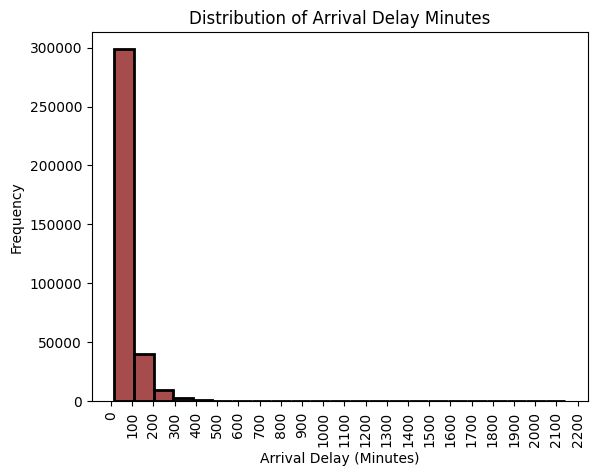

In [ ]:
import seaborn as sns
data_range = max - min
tick_interval = 100
num_ticks = int(np.ceil(data_range / tick_interval)) + 1
x_ticks = np.arange(0, num_ticks * tick_interval, tick_interval)
ax = sns.histplot(data=regression_data['ArrDelayMinutes'], bins=num_ticks, kde=False, color='maroon',alpha = 0.7,linewidth = 2)
plt.xticks(x_ticks)

plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Minutes')
plt.xticks(rotation=90)
plt.show()


15-100


In [ ]:
df = regression_data[regression_data["ArrDelayMinutes"].between(0, 100)]
print(df.shape)
X = df.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15','Predicted_ArrDelayMinutes'])
y = df['ArrDelayMinutes']
y_pred_regressor = regressor.predict(X)
Metrics(y,y_pred_regressor)

(290989, 27)
MAE:  3.251392544048057
MSE:  60.71758227347083
RMSE:  7.792148758427988
R-Squared:  0.877688532905754


In [ ]:
df = regression_data[regression_data["ArrDelayMinutes"].between(100, 200)]
print(df.shape)
X = df.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15','Predicted_ArrDelayMinutes'])
y = df['ArrDelayMinutes']
y_pred_regressor = regressor.predict(X)
Metrics(y,y_pred_regressor)

(48791, 27)
MAE:  5.4468670451517704
MSE:  210.68582569941177
RMSE:  14.515020692352174
R-Squared:  0.7169934645644236


In [ ]:
df = regression_data[regression_data["ArrDelayMinutes"].between(200, 500)]
print(df.shape)
X = df.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15','Predicted_ArrDelayMinutes'])
y = df['ArrDelayMinutes']
y_pred_regressor = regressor.predict(X)
Metrics(y,y_pred_regressor)

(14187, 27)
MAE:  5.796618735462043
MSE:  278.2141750264327
RMSE:  16.67975344621235
R-Squared:  0.9363823994686887


In [ ]:
df = regression_data[regression_data["ArrDelayMinutes"].between(500, 1000)]
print(df.shape)
X = df.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15','Predicted_ArrDelayMinutes'])
y = df['ArrDelayMinutes']
y_pred_regressor = regressor.predict(X)
Metrics(y,y_pred_regressor)

(1112, 27)
MAE:  4.890458633093526
MSE:  155.41881411870506
RMSE:  12.46670823107307
R-Squared:  0.9921484872664549


In [ ]:
df = regression_data[regression_data["ArrDelayMinutes"].between(1000, 2200)]
print(df.shape)
X = df.drop(columns = ['ArrDelayMinutes','Predicted_ArrDel15','ArrDel15','Predicted_ArrDelayMinutes'])
y = df['ArrDelayMinutes']
y_pred_regressor = regressor.predict(X)
Metrics(y,y_pred_regressor)

(175, 27)
MAE:  5.7495428571428535
MSE:  187.27014914285698
RMSE:  13.684668397255995
R-Squared:  0.9948355482181694
